## Deep Learning (with Keras)

In this assignment we will be exploring deep learnign with Keras and the Fasion-MNIST dataset. 

We start with imports.

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
import random

In [3]:
%matplotlib inline

In [4]:
seed = random.seed(1234)

In [5]:
random.seed(1234)

### Load Data

We now load and organise our data.

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size = 0.16666, random_state = seed)

### Initial Model

We'll now build our models.

In [8]:
initial_net = models.Sequential()

In [9]:
initial_net.add(layers.Dense(512, activation='relu', input_shape= (28 * 28,)))
initial_net.add(layers.Dense(512, activation='relu'))
initial_net.add(layers.Dense(512, activation='relu'))
initial_net.add(layers.Dense(512, activation='relu'))
initial_net.add(layers.Dense(10, activation='softmax'))


In [10]:
initial_net.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
initial_net = initial_net.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 149us/step - loss: 0.5106 - acc: 0.8377 - val_loss: 0.2187 - val_acc: 0.9347
Epoch 2/200
50000/50000 [==============================] - 8s 159us/step - loss: 0.1562 - acc: 0.9531 - val_loss: 0.2447 - val_acc: 0.9312
Epoch 3/200
50000/50000 [==============================] - 7s 146us/step - loss: 0.0980 - acc: 0.9704 - val_loss: 0.1114 - val_acc: 0.9676
Epoch 4/200
50000/50000 [==============================] - 8s 163us/step - loss: 0.0654 - acc: 0.9802 - val_loss: 0.1104 - val_acc: 0.9703
Epoch 5/200
50000/50000 [==============================] - 7s 145us/step - loss: 0.0493 - acc: 0.9851 - val_loss: 0.0971 - val_acc: 0.9740
Epoch 6/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.0367 - acc: 0.9885 - val_loss: 0.1158 - val_acc: 0.9735
Epoch 7/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.0276 - acc: 0.9916 - val_loss: 0.

50000/50000 [==============================] - 7s 141us/step - loss: 0.0075 - acc: 0.9986 - val_loss: 0.1853 - val_acc: 0.9815
Epoch 60/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.0058 - acc: 0.9991 - val_loss: 0.1891 - val_acc: 0.9800
Epoch 61/200
50000/50000 [==============================] - 8s 160us/step - loss: 0.0050 - acc: 0.9991 - val_loss: 0.2173 - val_acc: 0.9794
Epoch 62/200
50000/50000 [==============================] - 7s 144us/step - loss: 0.0057 - acc: 0.9989 - val_loss: 0.1936 - val_acc: 0.9792
Epoch 63/200
50000/50000 [==============================] - 7s 147us/step - loss: 0.0041 - acc: 0.9993 - val_loss: 0.2195 - val_acc: 0.9775
Epoch 64/200
50000/50000 [==============================] - 7s 150us/step - loss: 0.0081 - acc: 0.9989 - val_loss: 0.2200 - val_acc: 0.9758
Epoch 65/200
50000/50000 [==============================] - 7s 144us/step - loss: 0.0076 - acc: 0.9989 - val_loss: 0.1711 - val_acc: 0.9807
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 10s 203us/step - loss: 0.0042 - acc: 0.9994 - val_loss: 0.2298 - val_acc: 0.9794
Epoch 118/200
50000/50000 [==============================] - 9s 171us/step - loss: 0.0045 - acc: 0.9993 - val_loss: 0.2072 - val_acc: 0.9820
Epoch 119/200
50000/50000 [==============================] - 9s 176us/step - loss: 0.0077 - acc: 0.9991 - val_loss: 0.2100 - val_acc: 0.9808
Epoch 120/200
50000/50000 [==============================] - 10s 193us/step - loss: 0.0068 - acc: 0.9989 - val_loss: 0.2210 - val_acc: 0.9800
Epoch 121/200
50000/50000 [==============================] - 8s 164us/step - loss: 0.0051 - acc: 0.9995 - val_loss: 0.1932 - val_acc: 0.9827
Epoch 122/200
50000/50000 [==============================] - 8s 163us/step - loss: 0.0079 - acc: 0.9991 - val_loss: 0.2227 - val_acc: 0.9806
Epoch 123/200
50000/50000 [==============================] - 6s 123us/step - loss: 0.0046 - acc: 0.9994 - val_loss: 0.1914 - val_acc: 0.9815
Epoch 124/200
50000/50000

50000/50000 [==============================] - 8s 165us/step - loss: 0.0031 - acc: 0.9996 - val_loss: 0.2528 - val_acc: 0.9799
Epoch 176/200
50000/50000 [==============================] - 8s 158us/step - loss: 0.0093 - acc: 0.9991 - val_loss: 0.2471 - val_acc: 0.9794
Epoch 177/200
50000/50000 [==============================] - 7s 149us/step - loss: 0.0074 - acc: 0.9991 - val_loss: 0.2375 - val_acc: 0.9796
Epoch 178/200
50000/50000 [==============================] - 7s 148us/step - loss: 0.0064 - acc: 0.9993 - val_loss: 0.2359 - val_acc: 0.9792
Epoch 179/200
50000/50000 [==============================] - 7s 149us/step - loss: 0.0085 - acc: 0.9989 - val_loss: 0.2142 - val_acc: 0.9815
Epoch 180/200
50000/50000 [==============================] - 7s 149us/step - loss: 0.0047 - acc: 0.9995 - val_loss: 0.2228 - val_acc: 0.9810
Epoch 181/200
50000/50000 [==============================] - 8s 155us/step - loss: 0.0034 - acc: 0.9996 - val_loss: 0.2493 - val_acc: 0.9803
Epoch 182/200
50000/50000 [

### Analysis

In [12]:
initial_accuracy =  initial_net.history['val_acc']
initial_loss = initial_net.history['val_loss']

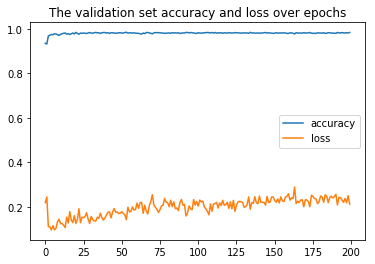

In [13]:
plt.plot(initial_accuracy)
plt.plot(initial_loss)
plt.legend(['accuracy', 'loss'])
plt.title('The validation set accuracy and loss over epochs')
plt.show()

### Dropout Network

In [14]:
network_dropout = models.Sequential()

In [15]:
network_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10, activation='softmax'))


In [16]:
network_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
network_dropout = network_dropout.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 11s 216us/step - loss: 0.7252 - acc: 0.7607 - val_loss: 0.2364 - val_acc: 0.9253
Epoch 2/200
50000/50000 [==============================] - 10s 196us/step - loss: 0.2629 - acc: 0.9225 - val_loss: 0.1616 - val_acc: 0.9519
Epoch 3/200
50000/50000 [==============================] - 10s 192us/step - loss: 0.1982 - acc: 0.9429 - val_loss: 0.1196 - val_acc: 0.9662
Epoch 4/200
50000/50000 [==============================] - 10s 196us/step - loss: 0.1617 - acc: 0.9544 - val_loss: 0.1124 - val_acc: 0.9686
Epoch 5/200
50000/50000 [==============================] - 10s 198us/step - loss: 0.1419 - acc: 0.9606 - val_loss: 0.0998 - val_acc: 0.9729
Epoch 6/200
50000/50000 [==============================] - 10s 207us/step - loss: 0.1264 - acc: 0.9646 - val_loss: 0.0902 - val_acc: 0.9759
Epoch 7/200
50000/50000 [==============================] - 10s 196us/step - loss: 0.1137 - acc: 0.9690 - val_l

Epoch 59/200
50000/50000 [==============================] - 9s 181us/step - loss: 0.0486 - acc: 0.9895 - val_loss: 0.1059 - val_acc: 0.9806
Epoch 60/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.0505 - acc: 0.9903 - val_loss: 0.1083 - val_acc: 0.9817
Epoch 61/200
50000/50000 [==============================] - 9s 177us/step - loss: 0.0466 - acc: 0.9902 - val_loss: 0.1092 - val_acc: 0.9820
Epoch 62/200
50000/50000 [==============================] - 9s 186us/step - loss: 0.0460 - acc: 0.9906 - val_loss: 0.1227 - val_acc: 0.9816
Epoch 63/200
50000/50000 [==============================] - 11s 214us/step - loss: 0.0500 - acc: 0.9901 - val_loss: 0.1095 - val_acc: 0.9810
Epoch 64/200
50000/50000 [==============================] - 10s 208us/step - loss: 0.0504 - acc: 0.9899 - val_loss: 0.1165 - val_acc: 0.9805
Epoch 65/200
50000/50000 [==============================] - 9s 180us/step - loss: 0.0471 - acc: 0.9901 - val_loss: 0.1036 - val_acc: 0.9818
Epoch 66/200
50000

50000/50000 [==============================] - 9s 176us/step - loss: 0.0543 - acc: 0.9913 - val_loss: 0.1515 - val_acc: 0.9813
Epoch 118/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.0516 - acc: 0.9919 - val_loss: 0.1508 - val_acc: 0.9805
Epoch 119/200
50000/50000 [==============================] - 10s 203us/step - loss: 0.0553 - acc: 0.9913 - val_loss: 0.1575 - val_acc: 0.9808
Epoch 120/200
50000/50000 [==============================] - 12s 240us/step - loss: 0.0590 - acc: 0.9916 - val_loss: 0.1421 - val_acc: 0.9816
Epoch 121/200
50000/50000 [==============================] - 11s 217us/step - loss: 0.0527 - acc: 0.9915 - val_loss: 0.1349 - val_acc: 0.9821
Epoch 122/200
50000/50000 [==============================] - 10s 200us/step - loss: 0.0603 - acc: 0.9914 - val_loss: 0.1466 - val_acc: 0.9814
Epoch 123/200
50000/50000 [==============================] - 11s 225us/step - loss: 0.0546 - acc: 0.9918 - val_loss: 0.1573 - val_acc: 0.9811
Epoch 124/200
50000/50

50000/50000 [==============================] - 9s 178us/step - loss: 0.0751 - acc: 0.9914 - val_loss: 0.1705 - val_acc: 0.9813
Epoch 176/200
50000/50000 [==============================] - 9s 179us/step - loss: 0.0662 - acc: 0.9913 - val_loss: 0.1694 - val_acc: 0.9812
Epoch 177/200
50000/50000 [==============================] - 9s 186us/step - loss: 0.0654 - acc: 0.9925 - val_loss: 0.1829 - val_acc: 0.9817
Epoch 178/200
50000/50000 [==============================] - 9s 185us/step - loss: 0.0615 - acc: 0.9926 - val_loss: 0.1991 - val_acc: 0.9810
Epoch 179/200
50000/50000 [==============================] - 15s 307us/step - loss: 0.0753 - acc: 0.9915 - val_loss: 0.1786 - val_acc: 0.9809
Epoch 180/200
50000/50000 [==============================] - 10s 202us/step - loss: 0.0664 - acc: 0.9922 - val_loss: 0.1771 - val_acc: 0.9819
Epoch 181/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.0698 - acc: 0.9922 - val_loss: 0.1888 - val_acc: 0.9805
Epoch 182/200
50000/5000

### Dropout Analysis

In [18]:
accuracy_dropout = network_dropout.history['val_acc']
loss_dropout = network_dropout.history['val_loss']

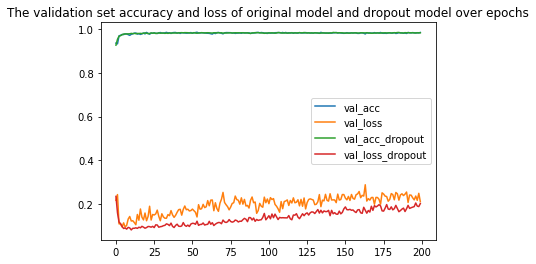

In [19]:
plt.plot(initial_accuracy)
plt.plot(initial_loss)
plt.plot(accuracy_dropout)
plt.plot(loss_dropout)
plt.legend(['val_acc', 'val_loss', 'val_acc_dropout', 'val_loss_dropout'])
plt.title('The validation set accuracy and loss of original model and dropout model over epochs')
plt.show()

### Weight Regularisation

We'll now try weight regularised models.

In [20]:
network_l1 = models.Sequential()


In [21]:
network_l1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(10, activation='softmax'))

In [22]:
network_l1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
network_l1 = network_l1.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 99us/step - loss: 13.6409 - acc: 0.6662 - val_loss: 4.0496 - val_acc: 0.7314
Epoch 2/200
50000/50000 [==============================] - 6s 119us/step - loss: 3.0266 - acc: 0.7900 - val_loss: 2.4150 - val_acc: 0.8351
Epoch 3/200
50000/50000 [==============================] - 5s 110us/step - loss: 2.1945 - acc: 0.8299 - val_loss: 2.0150 - val_acc: 0.8283
Epoch 4/200
50000/50000 [==============================] - 5s 104us/step - loss: 1.8613 - acc: 0.8595 - val_loss: 1.7823 - val_acc: 0.8675
Epoch 5/200
50000/50000 [==============================] - 5s 105us/step - loss: 1.6821 - acc: 0.8758 - val_loss: 1.5724 - val_acc: 0.8999
Epoch 6/200
50000/50000 [==============================] - 6s 120us/step - loss: 1.5626 - acc: 0.8885 - val_loss: 1.5155 - val_acc: 0.8890
Epoch 7/200
50000/50000 [==============================] - 6s 115us/step - loss: 1.4735 - acc: 0.8977 - val_loss: 1.

50000/50000 [==============================] - 5s 101us/step - loss: 0.9608 - acc: 0.9514 - val_loss: 1.0273 - val_acc: 0.9345
Epoch 60/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.9614 - acc: 0.9518 - val_loss: 0.9826 - val_acc: 0.9448
Epoch 61/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.9585 - acc: 0.9519 - val_loss: 0.9909 - val_acc: 0.9421
Epoch 62/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.9584 - acc: 0.9512 - val_loss: 1.0348 - val_acc: 0.9270
Epoch 63/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.9544 - acc: 0.9524 - val_loss: 0.9771 - val_acc: 0.9458
Epoch 64/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.9582 - acc: 0.9505 - val_loss: 0.9654 - val_acc: 0.9490
Epoch 65/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.9506 - acc: 0.9528 - val_loss: 0.9926 - val_acc: 0.9403
Epoch 66/200
50000/50000 [=======

Epoch 118/200
50000/50000 [==============================] - 5s 107us/step - loss: 0.9146 - acc: 0.9554 - val_loss: 0.9317 - val_acc: 0.9505
Epoch 119/200
50000/50000 [==============================] - 5s 98us/step - loss: 0.9112 - acc: 0.9558 - val_loss: 0.9729 - val_acc: 0.9366
Epoch 120/200
50000/50000 [==============================] - 5s 96us/step - loss: 0.9140 - acc: 0.9545 - val_loss: 0.9384 - val_acc: 0.9467
Epoch 121/200
50000/50000 [==============================] - 5s 97us/step - loss: 0.9115 - acc: 0.9546 - val_loss: 0.9173 - val_acc: 0.9546
Epoch 122/200
50000/50000 [==============================] - 6s 123us/step - loss: 0.9119 - acc: 0.9551 - val_loss: 0.9700 - val_acc: 0.9392
Epoch 123/200
50000/50000 [==============================] - 6s 110us/step - loss: 0.9096 - acc: 0.9560 - val_loss: 0.9427 - val_acc: 0.9430
Epoch 124/200
50000/50000 [==============================] - 5s 99us/step - loss: 0.9091 - acc: 0.9571 - val_loss: 1.0101 - val_acc: 0.9266
Epoch 125/200
500

50000/50000 [==============================] - 5s 99us/step - loss: 0.8928 - acc: 0.9575 - val_loss: 0.9012 - val_acc: 0.9562
Epoch 177/200
50000/50000 [==============================] - 5s 107us/step - loss: 0.8924 - acc: 0.9574 - val_loss: 0.9155 - val_acc: 0.9492
Epoch 178/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.8904 - acc: 0.9587 - val_loss: 0.9647 - val_acc: 0.9350
Epoch 179/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.8919 - acc: 0.9575 - val_loss: 0.9055 - val_acc: 0.9544
Epoch 180/200
50000/50000 [==============================] - 6s 116us/step - loss: 0.8889 - acc: 0.9585 - val_loss: 0.9104 - val_acc: 0.9511
Epoch 181/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.8915 - acc: 0.9582 - val_loss: 0.9465 - val_acc: 0.9402
Epoch 182/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.8911 - acc: 0.9575 - val_loss: 0.9007 - val_acc: 0.9544
Epoch 183/200
50000/50000 [=

In [24]:
network_l2 = models.Sequential()

In [25]:
network_l2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(10, activation='softmax'))


In [26]:
network_l2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
network_l2 = network_l2.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 101us/step - loss: 1.8395 - acc: 0.8259 - val_loss: 1.1913 - val_acc: 0.9016
Epoch 2/200
50000/50000 [==============================] - 5s 109us/step - loss: 0.8540 - acc: 0.9349 - val_loss: 0.6058 - val_acc: 0.9581
Epoch 3/200
50000/50000 [==============================] - 5s 99us/step - loss: 0.5381 - acc: 0.9515 - val_loss: 0.4439 - val_acc: 0.9596
Epoch 4/200
50000/50000 [==============================] - 6s 111us/step - loss: 0.4023 - acc: 0.9606 - val_loss: 0.3505 - val_acc: 0.9636
Epoch 5/200
50000/50000 [==============================] - 5s 97us/step - loss: 0.3317 - acc: 0.9649 - val_loss: 0.3315 - val_acc: 0.9596
Epoch 6/200
50000/50000 [==============================] - 5s 108us/step - loss: 0.2869 - acc: 0.9681 - val_loss: 0.2662 - val_acc: 0.9720
Epoch 7/200
50000/50000 [==============================] - 5s 108us/step - loss: 0.2541 - acc: 0.9724 - val_loss: 0.23

50000/50000 [==============================] - 5s 99us/step - loss: 0.0978 - acc: 0.9900 - val_loss: 0.1560 - val_acc: 0.9722
Epoch 60/200
50000/50000 [==============================] - 5s 99us/step - loss: 0.0959 - acc: 0.9905 - val_loss: 0.1362 - val_acc: 0.9791
Epoch 61/200
50000/50000 [==============================] - 5s 99us/step - loss: 0.0922 - acc: 0.9911 - val_loss: 0.1498 - val_acc: 0.9770
Epoch 62/200
50000/50000 [==============================] - 6s 130us/step - loss: 0.0957 - acc: 0.9904 - val_loss: 0.1732 - val_acc: 0.9677
Epoch 63/200
50000/50000 [==============================] - 7s 131us/step - loss: 0.0925 - acc: 0.9910 - val_loss: 0.1442 - val_acc: 0.9770
Epoch 64/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.0970 - acc: 0.9893 - val_loss: 0.1341 - val_acc: 0.9796
Epoch 65/200
50000/50000 [==============================] - 5s 98us/step - loss: 0.0906 - acc: 0.9916 - val_loss: 0.1521 - val_acc: 0.9726
Epoch 66/200
50000/50000 [===========

50000/50000 [==============================] - 5s 99us/step - loss: 0.0820 - acc: 0.9918 - val_loss: 0.1821 - val_acc: 0.9649
Epoch 118/200
50000/50000 [==============================] - 5s 97us/step - loss: 0.0787 - acc: 0.9928 - val_loss: 0.1342 - val_acc: 0.9771
Epoch 119/200
50000/50000 [==============================] - 5s 106us/step - loss: 0.0817 - acc: 0.9919 - val_loss: 0.2221 - val_acc: 0.9559
Epoch 120/200
50000/50000 [==============================] - 5s 108us/step - loss: 0.0813 - acc: 0.9920 - val_loss: 0.1350 - val_acc: 0.9767
Epoch 121/200
50000/50000 [==============================] - 5s 98us/step - loss: 0.0804 - acc: 0.9928 - val_loss: 0.1440 - val_acc: 0.9761
Epoch 122/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.0820 - acc: 0.9918 - val_loss: 0.1391 - val_acc: 0.9768
Epoch 123/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.0795 - acc: 0.9925 - val_loss: 0.1604 - val_acc: 0.9727
Epoch 124/200
50000/50000 [===

50000/50000 [==============================] - 5s 97us/step - loss: 0.0733 - acc: 0.9935 - val_loss: 0.1449 - val_acc: 0.9732
Epoch 176/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.0780 - acc: 0.9923 - val_loss: 0.1403 - val_acc: 0.9758
Epoch 177/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.0777 - acc: 0.9923 - val_loss: 0.2521 - val_acc: 0.9530
Epoch 178/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.0762 - acc: 0.9930 - val_loss: 0.1566 - val_acc: 0.9718
Epoch 179/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.0787 - acc: 0.9921 - val_loss: 0.1373 - val_acc: 0.9746
Epoch 180/200
50000/50000 [==============================] - 5s 90us/step - loss: 0.0757 - acc: 0.9922 - val_loss: 0.1330 - val_acc: 0.9769
Epoch 181/200
50000/50000 [==============================] - 5s 99us/step - loss: 0.0759 - acc: 0.9925 - val_loss: 0.1331 - val_acc: 0.9761
Epoch 182/200
50000/50000 [===

### Analysis

In [28]:
loss_l1 = network_l1.history['val_loss']
loss_l2 = network_l2.history['val_loss']

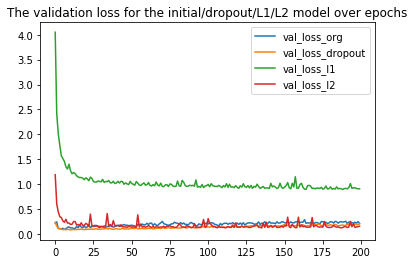

In [29]:
plt.plot(initial_loss)
plt.plot(loss_dropout)
plt.plot(loss_l1)
plt.plot(loss_l2)
plt.legend(['val_loss_org', 'val_loss_dropout', 'val_loss_l1', 'val_loss_l2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.show()


### Alternate Models

The first model is similar to our dropout and has one extra layer.

In [30]:
model_1 = models.Sequential()

In [31]:
model_1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(512, activation='relu'))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(512, activation='relu'))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(10, activation='softmax'))

In [32]:
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
model_1 = model_1.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 239us/step - loss: 0.0382 - acc: 0.9886 - val_loss: 0.0984 - val_acc: 0.9811
Epoch 2/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.0415 - acc: 0.9885 - val_loss: 0.0978 - val_acc: 0.9820
Epoch 3/100
50000/50000 [==============================] - 8s 150us/step - loss: 0.0395 - acc: 0.9884 - val_loss: 0.0984 - val_acc: 0.9812
Epoch 4/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.0394 - acc: 0.9894 - val_loss: 0.1003 - val_acc: 0.9799
Epoch 5/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.0351 - acc: 0.9900 - val_loss: 0.0978 - val_acc: 0.9813
Epoch 6/100
50000/50000 [==============================] - 10s 198us/step - loss: 0.0375 - acc: 0.9894 - val_loss: 0.1081 - val_acc: 0.9821
Epoch 7/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.0351 - acc: 0.9902 - val_loss: 

50000/50000 [==============================] - 7s 149us/step - loss: 0.0289 - acc: 0.9931 - val_loss: 0.1317 - val_acc: 0.9803
Epoch 60/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.0296 - acc: 0.9928 - val_loss: 0.1290 - val_acc: 0.9820
Epoch 61/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.0290 - acc: 0.9940 - val_loss: 0.1325 - val_acc: 0.9818
Epoch 62/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.0297 - acc: 0.9931 - val_loss: 0.1344 - val_acc: 0.9813
Epoch 63/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.0290 - acc: 0.9933 - val_loss: 0.1476 - val_acc: 0.9801
Epoch 64/100
50000/50000 [==============================] - 7s 148us/step - loss: 0.0258 - acc: 0.9940 - val_loss: 0.1366 - val_acc: 0.9812
Epoch 65/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.0296 - acc: 0.9934 - val_loss: 0.1386 - val_acc: 0.9820
Epoch 66/100
50000/50000 [=======

In [35]:
model_2 = models.Sequential()

Our second model uses one less dropout layer, and the SGD optimizer.

In [36]:
model_2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(10, activation='softmax'))


In [37]:
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
model_2 = model_2.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 78us/step - loss: 2.1333 - acc: 0.2552 - val_loss: 1.7456 - val_acc: 0.7126
Epoch 2/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.6642 - acc: 0.5129 - val_loss: 1.2454 - val_acc: 0.7846
Epoch 3/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.2893 - acc: 0.6287 - val_loss: 0.9109 - val_acc: 0.8164
Epoch 4/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.0515 - acc: 0.6878 - val_loss: 0.7282 - val_acc: 0.8392
Epoch 5/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.9066 - acc: 0.7259 - val_loss: 0.6243 - val_acc: 0.8490
Epoch 6/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.8090 - acc: 0.7547 - val_loss: 0.5563 - val_acc: 0.8616
Epoch 7/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.7443 - acc: 0.7728 - val_loss: 0.5111 - 

50000/50000 [==============================] - 4s 81us/step - loss: 0.2824 - acc: 0.9178 - val_loss: 0.2151 - val_acc: 0.9333
Epoch 60/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.2833 - acc: 0.9165 - val_loss: 0.2137 - val_acc: 0.9337
Epoch 61/100
50000/50000 [==============================] - 4s 79us/step - loss: 0.2788 - acc: 0.9177 - val_loss: 0.2113 - val_acc: 0.9349
Epoch 62/100
50000/50000 [==============================] - 4s 78us/step - loss: 0.2763 - acc: 0.9182 - val_loss: 0.2095 - val_acc: 0.9355
Epoch 63/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.2754 - acc: 0.9181 - val_loss: 0.2083 - val_acc: 0.9364
Epoch 64/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.2718 - acc: 0.9196 - val_loss: 0.2067 - val_acc: 0.9359
Epoch 65/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.2715 - acc: 0.9212 - val_loss: 0.2053 - val_acc: 0.9370
Epoch 66/100
50000/50000 [==============

We add more layers to our dropputs and use the ADAM optimizer.

In [39]:
model_3 = models.Sequential()


In [40]:
model_3.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(10, activation='softmax'))


In [41]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
model_3 = model_3.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 205us/step - loss: 0.7741 - acc: 0.7425 - val_loss: 0.2085 - val_acc: 0.9347
Epoch 2/100
50000/50000 [==============================] - 9s 189us/step - loss: 0.2565 - acc: 0.9242 - val_loss: 0.1427 - val_acc: 0.9594
Epoch 3/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.1908 - acc: 0.9444 - val_loss: 0.1170 - val_acc: 0.9661
Epoch 4/100
50000/50000 [==============================] - 9s 181us/step - loss: 0.1584 - acc: 0.9542 - val_loss: 0.1089 - val_acc: 0.9703
Epoch 5/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.1392 - acc: 0.9597 - val_loss: 0.0942 - val_acc: 0.9748
Epoch 6/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.1196 - acc: 0.9649 - val_loss: 0.0956 - val_acc: 0.9737
Epoch 7/100
50000/50000 [==============================] - 9s 188us/step - loss: 0.1142 - acc: 0.9664 - val_loss: 0

50000/50000 [==============================] - 9s 177us/step - loss: 0.0275 - acc: 0.9919 - val_loss: 0.0802 - val_acc: 0.9830
Epoch 60/100
50000/50000 [==============================] - 9s 178us/step - loss: 0.0277 - acc: 0.9921 - val_loss: 0.0794 - val_acc: 0.9831
Epoch 61/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.0263 - acc: 0.9923 - val_loss: 0.0819 - val_acc: 0.9830
Epoch 62/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.0277 - acc: 0.9919 - val_loss: 0.0802 - val_acc: 0.9836
Epoch 63/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.0226 - acc: 0.9931 - val_loss: 0.0872 - val_acc: 0.9826
Epoch 64/100
50000/50000 [==============================] - 9s 180us/step - loss: 0.0275 - acc: 0.9919 - val_loss: 0.0788 - val_acc: 0.9831
Epoch 65/100
50000/50000 [==============================] - 10s 194us/step - loss: 0.0260 - acc: 0.9921 - val_loss: 0.0820 - val_acc: 0.9843
Epoch 66/100
50000/50000 [======

We now use a simple model with no dropouts, but use adam as our optimizer.

In [81]:
model_4 = models.Sequential()

In [82]:
model_4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_4.add(layers.Dense(512, activation='relu'))
model_4.add(layers.Dense(512, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))


In [83]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
model_4 = model_4.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.3537 - acc: 0.8985 - val_loss: 0.1470 - val_acc: 0.9579
Epoch 2/100
50000/50000 [==============================] - 5s 101us/step - loss: 0.1122 - acc: 0.9662 - val_loss: 0.1032 - val_acc: 0.9692
Epoch 3/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.0698 - acc: 0.9789 - val_loss: 0.0914 - val_acc: 0.9708
Epoch 4/100
50000/50000 [==============================] - 5s 101us/step - loss: 0.0436 - acc: 0.9869 - val_loss: 0.0835 - val_acc: 0.9760
Epoch 5/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.0322 - acc: 0.9899 - val_loss: 0.0859 - val_acc: 0.9749
Epoch 6/100
50000/50000 [==============================] - 5s 94us/step - loss: 0.0236 - acc: 0.9923 - val_loss: 0.0887 - val_acc: 0.9773
Epoch 7/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.0149 - acc: 0.9952 - val_loss: 0.08

50000/50000 [==============================] - 6s 124us/step - loss: 0.0051 - acc: 0.9985 - val_loss: 0.1186 - val_acc: 0.9814
Epoch 60/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.1318 - val_acc: 0.9795
Epoch 61/100
50000/50000 [==============================] - 5s 110us/step - loss: 0.0066 - acc: 0.9981 - val_loss: 0.1198 - val_acc: 0.9809
Epoch 62/100
50000/50000 [==============================] - 5s 103us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.1058 - val_acc: 0.9827
Epoch 63/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.1031 - val_acc: 0.9838
Epoch 64/100
50000/50000 [==============================] - 6s 117us/step - loss: 8.2495e-04 - acc: 0.9997 - val_loss: 0.1112 - val_acc: 0.9832
Epoch 65/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.0037 - acc: 0.9989 - val_loss: 0.1325 - val_acc: 0.9802
Epoch 66/100
50000/50000 [====

We now use an even smaller and simpler model.

In [47]:
model_5 = models.Sequential()

In [48]:
model_5.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_5.add(layers.Dense(512, activation='relu'))
model_5.add(layers.Dense(10, activation='softmax'))

In [49]:

model_5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model_5 = model_5.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.4075 - acc: 0.8715 - val_loss: 0.1619 - val_acc: 0.9542
Epoch 2/100
50000/50000 [==============================] - 3s 61us/step - loss: 0.1412 - acc: 0.9568 - val_loss: 0.1117 - val_acc: 0.9661
Epoch 3/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.0869 - acc: 0.9728 - val_loss: 0.1154 - val_acc: 0.9624
Epoch 4/100
50000/50000 [==============================] - 3s 62us/step - loss: 0.0608 - acc: 0.9799 - val_loss: 0.1179 - val_acc: 0.9637
Epoch 5/100
50000/50000 [==============================] - 4s 72us/step - loss: 0.0433 - acc: 0.9863 - val_loss: 0.0731 - val_acc: 0.9780
Epoch 6/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.0304 - acc: 0.9899 - val_loss: 0.0754 - val_acc: 0.9782
Epoch 7/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.0234 - acc: 0.9928 - val_loss: 0.0846 - 

50000/50000 [==============================] - 4s 85us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.1673 - val_acc: 0.9814
Epoch 60/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.1602 - val_acc: 0.9816
Epoch 61/100
50000/50000 [==============================] - 4s 82us/step - loss: 8.3951e-04 - acc: 0.9999 - val_loss: 0.1736 - val_acc: 0.9804
Epoch 62/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.1618 - val_acc: 0.9819
Epoch 63/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.1692 - val_acc: 0.9810
Epoch 64/100
50000/50000 [==============================] - 4s 73us/step - loss: 8.4650e-04 - acc: 0.9997 - val_loss: 0.1707 - val_acc: 0.9800
Epoch 65/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.1729 - val_acc: 0.9814
Epoch 66/100
50000/50000 [======

We add a few more embedding layers, and use adagrad optimizer.

In [53]:
model_6 = models.Sequential()

In [54]:
model_6.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_6.add(layers.Dense(512, activation='relu'))
model_6.add(layers.Dense(512, activation='relu'))
model_6.add(layers.Dense(512, activation='relu'))
model_6.add(layers.Dense(512, activation='relu'))
model_6.add(layers.Dense(10, activation='softmax'))


In [55]:
model_6.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:

model_6 = model_6.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.8979 - acc: 0.7573 - val_loss: 0.1577 - val_acc: 0.9510
Epoch 2/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.1305 - acc: 0.9596 - val_loss: 0.1135 - val_acc: 0.9657
Epoch 3/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.0744 - acc: 0.9777 - val_loss: 0.1063 - val_acc: 0.9669
Epoch 4/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.0462 - acc: 0.9859 - val_loss: 0.0863 - val_acc: 0.9748
Epoch 5/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.0290 - acc: 0.9917 - val_loss: 0.0980 - val_acc: 0.9730
Epoch 6/100
50000/50000 [==============================] - 8s 156us/step - loss: 0.0188 - acc: 0.9947 - val_loss: 0.0917 - val_acc: 0.9765
Epoch 7/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.0109 - acc: 0.9971 - val_loss: 0.

Epoch 58/100
50000/50000 [==============================] - 8s 156us/step - loss: 2.0188e-05 - acc: 1.0000 - val_loss: 0.1360 - val_acc: 0.9791
Epoch 59/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.9643e-05 - acc: 1.0000 - val_loss: 0.1363 - val_acc: 0.9791
Epoch 60/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.9123e-05 - acc: 1.0000 - val_loss: 0.1365 - val_acc: 0.9791
Epoch 61/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.8636e-05 - acc: 1.0000 - val_loss: 0.1367 - val_acc: 0.9791
Epoch 62/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.8136e-05 - acc: 1.0000 - val_loss: 0.1369 - val_acc: 0.9791
Epoch 63/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.7707e-05 - acc: 1.0000 - val_loss: 0.1372 - val_acc: 0.9791
Epoch 64/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.7260e-05 - acc: 1.0000 - val_loss: 0.1375 - val_acc:

Our 7th model uses kernel regularizers.

In [57]:
model_7 = models.Sequential()


In [58]:
model_7.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
model_7.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_7.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_7.add(layers.Dense(10, activation='softmax'))


In [59]:
model_7.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [60]:
model_7 = model_7.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 81us/step - loss: 11.0954 - acc: 0.7456 - val_loss: 3.5370 - val_acc: 0.7528
Epoch 2/100
50000/50000 [==============================] - 4s 81us/step - loss: 2.5522 - acc: 0.8234 - val_loss: 2.1166 - val_acc: 0.7984
Epoch 3/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.8200 - acc: 0.8547 - val_loss: 1.6643 - val_acc: 0.8631
Epoch 4/100
50000/50000 [==============================] - 4s 80us/step - loss: 1.5606 - acc: 0.8708 - val_loss: 1.4478 - val_acc: 0.8885
Epoch 5/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.4068 - acc: 0.8846 - val_loss: 1.3637 - val_acc: 0.8864
Epoch 6/100
50000/50000 [==============================] - 4s 78us/step - loss: 1.3137 - acc: 0.8939 - val_loss: 1.2634 - val_acc: 0.9025
Epoch 7/100
50000/50000 [==============================] - 4s 80us/step - loss: 1.2445 - acc: 0.9000 - val_loss: 1.2315 -

50000/50000 [==============================] - 4s 90us/step - loss: 0.7696 - acc: 0.9608 - val_loss: 0.7915 - val_acc: 0.9527
Epoch 60/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.7688 - acc: 0.9607 - val_loss: 0.8475 - val_acc: 0.9359
Epoch 61/100
50000/50000 [==============================] - 4s 79us/step - loss: 0.7653 - acc: 0.9613 - val_loss: 0.8085 - val_acc: 0.9474
Epoch 62/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.7683 - acc: 0.9602 - val_loss: 0.7871 - val_acc: 0.9532
Epoch 63/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.7642 - acc: 0.9607 - val_loss: 0.8093 - val_acc: 0.9463
Epoch 64/100
50000/50000 [==============================] - 4s 79us/step - loss: 0.7641 - acc: 0.9610 - val_loss: 0.7817 - val_acc: 0.9548
Epoch 65/100
50000/50000 [==============================] - 4s 81us/step - loss: 0.7612 - acc: 0.9618 - val_loss: 0.7955 - val_acc: 0.9510
Epoch 66/100
50000/50000 [==============

We use another regularized model, but this time with the ADAM optimizer.

In [61]:
model_8 = models.Sequential()


In [62]:
model_8.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
model_8.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_8.add(layers.Dense(10, activation='softmax'))


In [63]:
model_8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [64]:
model_8 = model_8.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 66us/step - loss: 8.6392 - acc: 0.8506 - val_loss: 1.7594 - val_acc: 0.8778
Epoch 2/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.2700 - acc: 0.8892 - val_loss: 1.0079 - val_acc: 0.8917
Epoch 3/100
50000/50000 [==============================] - 3s 62us/step - loss: 0.8917 - acc: 0.9001 - val_loss: 0.8098 - val_acc: 0.9025
Epoch 4/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.7545 - acc: 0.9098 - val_loss: 0.7147 - val_acc: 0.9106
Epoch 5/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.6831 - acc: 0.9149 - val_loss: 0.6631 - val_acc: 0.9160
Epoch 6/100
50000/50000 [==============================] - 3s 64us/step - loss: 0.6387 - acc: 0.9189 - val_loss: 0.6291 - val_acc: 0.9188
Epoch 7/100
50000/50000 [==============================] - 3s 65us/step - loss: 0.6083 - acc: 0.9216 - val_loss: 0.6115 - 

50000/50000 [==============================] - 3s 67us/step - loss: 0.3652 - acc: 0.9595 - val_loss: 0.3858 - val_acc: 0.9531
Epoch 60/100
50000/50000 [==============================] - 3s 64us/step - loss: 0.3636 - acc: 0.9598 - val_loss: 0.3859 - val_acc: 0.9526
Epoch 61/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.3623 - acc: 0.9600 - val_loss: 0.3817 - val_acc: 0.9542
Epoch 62/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.3633 - acc: 0.9592 - val_loss: 0.3850 - val_acc: 0.9532
Epoch 63/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.3614 - acc: 0.9600 - val_loss: 0.3846 - val_acc: 0.9530
Epoch 64/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.3614 - acc: 0.9600 - val_loss: 0.3804 - val_acc: 0.9551
Epoch 65/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.3606 - acc: 0.9598 - val_loss: 0.3880 - val_acc: 0.9497
Epoch 66/100
50000/50000 [==============

This model contains both the l1 and l2 regularizer, and uses a adagrad optimizer.

In [65]:
model_9 = models.Sequential()

In [66]:
model_9.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
model_9.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_9.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_9.add(layers.Dense(10, activation='softmax'))

In [67]:
model_9.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])


In [68]:
model_9 = model_9.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 93us/step - loss: 4.9624 - acc: 0.7420 - val_loss: 2.0598 - val_acc: 0.8818
Epoch 2/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.6292 - acc: 0.8912 - val_loss: 1.4099 - val_acc: 0.8651
Epoch 3/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.1806 - acc: 0.9030 - val_loss: 1.0524 - val_acc: 0.9098
Epoch 4/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.9716 - acc: 0.9137 - val_loss: 0.9202 - val_acc: 0.9104
Epoch 5/100
50000/50000 [==============================] - 8s 170us/step - loss: 0.8560 - acc: 0.9198 - val_loss: 0.8199 - val_acc: 0.9189
Epoch 6/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.7836 - acc: 0.9243 - val_loss: 0.7831 - val_acc: 0.9154
Epoch 7/100
50000/50000 [==============================] - 10s 195us/step - loss: 0.7328 - acc: 0.9272 - val_loss: 0.

Epoch 59/100
50000/50000 [==============================] - 22s 450us/step - loss: 0.3671 - acc: 0.9564 - val_loss: 0.3908 - val_acc: 0.9481
Epoch 60/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.3659 - acc: 0.9560 - val_loss: 0.3904 - val_acc: 0.9464
Epoch 61/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.3651 - acc: 0.9567 - val_loss: 0.3895 - val_acc: 0.9474
Epoch 62/100
50000/50000 [==============================] - 23s 461us/step - loss: 0.3628 - acc: 0.9571 - val_loss: 0.3881 - val_acc: 0.9483
Epoch 63/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.3623 - acc: 0.9566 - val_loss: 0.3865 - val_acc: 0.9464
Epoch 64/100
50000/50000 [==============================] - 23s 453us/step - loss: 0.3613 - acc: 0.9569 - val_loss: 0.3868 - val_acc: 0.9472
Epoch 65/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.3597 - acc: 0.9569 - val_loss: 0.3821 - val_acc: 0.9494
Epoch 66/100


Our final model is a little more simple but very similar to our previous model, and uses RMSPROP.

In [69]:
model_10 = models.Sequential()

In [70]:
model_10.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
model_10.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_10.add(layers.Dense(10, activation='softmax'))

In [71]:
model_10.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [72]:

model_10 = model_10.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 52us/step - loss: 4.9433 - acc: 0.8185 - val_loss: 2.0063 - val_acc: 0.8295
Epoch 2/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4514 - acc: 0.8793 - val_loss: 1.5328 - val_acc: 0.8046
Epoch 3/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.0034 - acc: 0.9012 - val_loss: 0.9009 - val_acc: 0.9053
Epoch 4/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.8132 - acc: 0.9174 - val_loss: 0.7206 - val_acc: 0.9360
Epoch 5/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.7113 - acc: 0.9295 - val_loss: 0.6706 - val_acc: 0.9325
Epoch 6/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.6491 - acc: 0.9375 - val_loss: 0.6395 - val_acc: 0.9367
Epoch 7/100
50000/50000 [==============================] - 3s 50us/step - loss: 0.6090 - acc: 0.9433 - val_loss: 0.6063 - 

50000/50000 [==============================] - 3s 52us/step - loss: 0.4128 - acc: 0.9686 - val_loss: 0.4655 - val_acc: 0.9542
Epoch 60/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.4110 - acc: 0.9701 - val_loss: 0.4387 - val_acc: 0.9606
Epoch 61/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.4110 - acc: 0.9698 - val_loss: 0.4355 - val_acc: 0.9630
Epoch 62/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.4115 - acc: 0.9693 - val_loss: 0.4604 - val_acc: 0.9562
Epoch 63/100
50000/50000 [==============================] - 3s 50us/step - loss: 0.4111 - acc: 0.9691 - val_loss: 0.4384 - val_acc: 0.9623
Epoch 64/100
50000/50000 [==============================] - 3s 50us/step - loss: 0.4117 - acc: 0.9697 - val_loss: 0.4319 - val_acc: 0.9644
Epoch 65/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.4095 - acc: 0.9702 - val_loss: 0.4406 - val_acc: 0.9610
Epoch 66/100
50000/50000 [==============

### Final Analysis

In [76]:
model_1_hist = model_1.history['val_loss']
model_2_hist = model_2.history['val_loss']
model_3_hist = model_3.history['val_loss']
model_4_hist = model_4.history['val_loss']
model_5_hist = model_5.history['val_loss']
model_6_hist = model_6.history['val_loss']
model_7_hist = model_7.history['val_loss']
model_8_hist = model_8.history['val_loss']
model_9_hist = model_9.history['val_loss']
model_10_hist = model_10.history['val_loss']


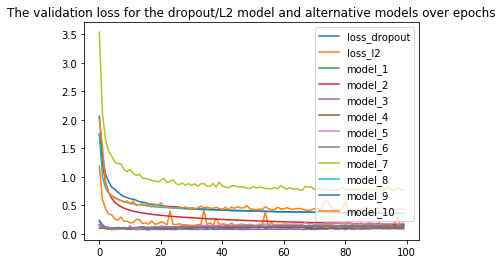

In [77]:
plt.plot(loss_dropout[:100])
plt.plot(loss_l2[:100])
plt.plot(model_1_hist)
plt.plot(model_2_hist)
plt.plot(model_3_hist)
plt.plot(model_4_hist)
plt.plot(model_5_hist)
plt.plot(model_6_hist)
plt.plot(model_7_hist)
plt.plot(model_8_hist)
plt.plot(model_9_hist)
plt.plot(model_10_hist)
plt.legend(['loss_dropout', 'loss_l2', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_10'])
plt.title('Validation Losses')
plt.show()

### FInal Model

It seems from our plot that our fourth model, which was a simple 4 layer model with the Adam optimizer worked best. Let us evaluate it now!

In [84]:
model_4.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.3598 - acc: 0.8976 - val_loss: 0.1564 - val_acc: 0.9535
Epoch 2/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.1117 - acc: 0.9667 - val_loss: 0.0976 - val_acc: 0.9707
Epoch 3/100
50000/50000 [==============================] - 7s 139us/step - loss: 0.0677 - acc: 0.9790 - val_loss: 0.0910 - val_acc: 0.9727
Epoch 4/100
50000/50000 [==============================] - 5s 104us/step - loss: 0.0456 - acc: 0.9858 - val_loss: 0.0773 - val_acc: 0.9790
Epoch 5/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.0301 - acc: 0.9905 - val_loss: 0.0858 - val_acc: 0.9761
Epoch 6/100
50000/50000 [==============================] - 7s 131us/step - loss: 0.0213 - acc: 0.9937 - val_loss: 0.0823 - val_acc: 0.9792
Epoch 7/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.0168 - acc: 0.9946 - val_loss: 0.

50000/50000 [==============================] - 5s 95us/step - loss: 2.3140e-06 - acc: 1.0000 - val_loss: 0.1023 - val_acc: 0.9841
Epoch 59/100
50000/50000 [==============================] - 5s 91us/step - loss: 2.1998e-06 - acc: 1.0000 - val_loss: 0.1026 - val_acc: 0.9842
Epoch 60/100
50000/50000 [==============================] - 5s 91us/step - loss: 2.0940e-06 - acc: 1.0000 - val_loss: 0.1028 - val_acc: 0.9842
Epoch 61/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.9878e-06 - acc: 1.0000 - val_loss: 0.1031 - val_acc: 0.9842
Epoch 62/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.8882e-06 - acc: 1.0000 - val_loss: 0.1033 - val_acc: 0.9842
Epoch 63/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.7978e-06 - acc: 1.0000 - val_loss: 0.1036 - val_acc: 0.9843
Epoch 64/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.7109e-06 - acc: 1.0000 - val_loss: 0.1039 - val_acc: 0.9842
Epoch 65/100

In [85]:
model_4.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 54us/step


[0.11927469967109819, 0.983]

A bunch of models perform well - but we chose this as it is the simplest and will likely not overfit. We can see it performs quite well on the test set too. It also seems using the Adam optimizer works well.